## Social Media Sentiment Analysis

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
Trainset = pd.read_csv('traindata.csv', on_bad_lines='skip')
Testset = pd.read_csv('testdata.csv', on_bad_lines='skip')

In [3]:
Trainset.head()

,id,label,tweet
0,1,1,#Promotion #Excited @JohnDoe I just got a prom...
1,2,0,#LostWallet #Nightmare @JaneDoe I can't believ...
2,3,1,#GreatBook #PageTurner @BobSmith Just finished...
3,4,0,#TerribleDay #WorkFail @SarahJones I had a ter...
4,5,1,#BakingSuccess #Delicious @MikeWilson I finall...


In [4]:
Testset.head()

,id,label,tweet
0,1,1,@JohnDoe I just got a promotion at work! Feeli...
1,2,0,@JaneDoe I can't believe I lost my wallet at t...
2,3,1,@BobSmith Just finished an incredible book! It...
3,4,0,@SarahJones I had a terrible day at work. Ever...
4,5,1,@MikeWilson I finally learned how to bake a ca...


In [5]:
combined = pd.concat([Trainset,Testset])
combined.sort_values(by='id')

,id,label,tweet
0,1,1,#Promotion #Excited @JohnDoe I just got a prom...
0,1,1,@JohnDoe I just got a promotion at work! Feeli...
1,2,0,@JaneDoe I can't believe I lost my wallet at t...
1,2,0,#LostWallet #Nightmare @JaneDoe I can't believ...
2,3,1,#GreatBook #PageTurner @BobSmith Just finished...
...,...,...,...
1329,1396,0,#TrafficJam #Frustrated @EmilyDavis I got stuc...
1330,1397,1,#HikeSuccess #AmazingViews @DavidBrown I went ...
1331,1398,0,#CoffeeSpill #Clumsy @LisaMiller I spilled cof...
1332,1399,1,#AuntUncleNews #Thrilled @JohnnyRockets I just...


In [6]:
combined.shape

(1735, 3)

In [7]:
# Strip potential whitespace from column names
combined.columns = combined.columns.str.strip()

# Check for and replace any invisible unicode characters
import unicodedata
def clean_column_name(name):
    return unicodedata.normalize('NFKC', name)

combined.columns = [clean_column_name(col) for col in combined.columns]

# Now try the string replacement again
combined['tidy_tweet'] = combined['tweet'].str.replace("@[\w]*", " ")
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [8]:
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,1,#Promotion #Excited @JohnDoe I just got a prom...,#Promotion #Excited @JohnDoe I just got a prom...
1,2,0,#LostWallet #Nightmare @JaneDoe I can't believ...,#LostWallet #Nightmare @JaneDoe I can't believ...
2,3,1,#GreatBook #PageTurner @BobSmith Just finished...,#GreatBook #PageTurner @BobSmith Just finished...
3,4,0,#TerribleDay #WorkFail @SarahJones I had a ter...,#TerribleDay #WorkFail @SarahJones I had a ter...
4,5,1,#BakingSuccess #Delicious @MikeWilson I finall...,#BakingSuccess #Delicious @MikeWilson I finall...
5,6,0,#TrafficJam #Frustrating @EmilyDavis I got stu...,#TrafficJam #Frustrating @EmilyDavis I got stu...
6,7,1,#AdoptedPuppy #Sweet @DavidBrown I just adopte...,#AdoptedPuppy #Sweet @DavidBrown I just adopte...
7,8,0,#SpilledCoffee #Worried @LisaMiller I spilled ...,#SpilledCoffee #Worried @LisaMiller I spilled ...
8,9,1,#MountainTrip #BreathtakingViews @JohnnyRocket...,#MountainTrip #BreathtakingViews @JohnnyRocket...
9,10,0,#NeighborFight #Awkward @SophiaTaylor I had a ...,#NeighborFight #Awkward @SophiaTaylor I had a ...


In [9]:
combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined

,id,label,tweet,tidy_tweet
0,1,1,#Promotion #Excited @JohnDoe I just got a prom...,#Promotion #Excited @JohnDoe just promotion wo...
1,2,0,#LostWallet #Nightmare @JaneDoe I can't believ...,#LostWallet #Nightmare @JaneDoe can't believe ...
2,3,1,#GreatBook #PageTurner @BobSmith Just finished...,#GreatBook #PageTurner @BobSmith Just finished...
3,4,0,#TerribleDay #WorkFail @SarahJones I had a ter...,#TerribleDay #WorkFail @SarahJones terrible wo...
4,5,1,#BakingSuccess #Delicious @MikeWilson I finall...,#BakingSuccess #Delicious @MikeWilson finally ...
...,...,...,...,...
396,396,0,@SophiaDavis I lost my favorite jacket. I can'...,@SophiaDavis lost favorite jacket. can't belie...
397,397,1,@EthanGreen I had a wonderful day at the beach...,@EthanGreen wonderful beach! weather perfect.
398,398,0,@AvaJohnson I got a call from a telemarketer d...,@AvaJohnson call from telemarketer during dinn...
399,399,1,@JacobMiller I just discovered a new hobby! Pa...,@JacobMiller just discovered hobby! Painting r...


### Tokenization

In [10]:
tokenize_tweet = combined['tidy_tweet'].apply(lambda x: x.split(' '))
tokenize_tweet

,tidy_tweet
0,"[#Promotion, #Excited, @JohnDoe, just, promoti..."
1,"[#LostWallet, #Nightmare, @JaneDoe, can't, bel..."
2,"[#GreatBook, #PageTurner, @BobSmith, Just, fin..."
3,"[#TerribleDay, #WorkFail, @SarahJones, terribl..."
4,"[#BakingSuccess, #Delicious, @MikeWilson, fina..."
...,...
396,"[@SophiaDavis, lost, favorite, jacket., can't,..."
397,"[@EthanGreen, wonderful, beach!, weather, perf..."
398,"[@AvaJohnson, call, from, telemarketer, during..."
399,"[@JacobMiller, just, discovered, hobby!, Paint..."


In [11]:
import nltk
nltk.download('wordnet')
wnlemma = nltk.WordNetLemmatizer()
tokenize_tweet = combined['tidy_tweet'].apply(lambda x: [wnlemma.lemmatize(t) for t in x.split(' ')])

[nltk_data] Downloading package wordnet to /root/nltk_data...


### Lemmatization

In [12]:
tokenize_tweet

,tidy_tweet
0,"[#Promotion, #Excited, @JohnDoe, just, promoti..."
1,"[#LostWallet, #Nightmare, @JaneDoe, can't, bel..."
2,"[#GreatBook, #PageTurner, @BobSmith, Just, fin..."
3,"[#TerribleDay, #WorkFail, @SarahJones, terribl..."
4,"[#BakingSuccess, #Delicious, @MikeWilson, fina..."
...,...
396,"[@SophiaDavis, lost, favorite, jacket., can't,..."
397,"[@EthanGreen, wonderful, beach!, weather, perf..."
398,"[@AvaJohnson, call, from, telemarketer, during..."
399,"[@JacobMiller, just, discovered, hobby!, Paint..."


In [13]:
combined['tidy_tweet']= tokenize_tweet.apply(lambda x: ' '.join(t for t in x))
combined['tidy_tweet']

,tidy_tweet
0,#Promotion #Excited @JohnDoe just promotion wo...
1,#LostWallet #Nightmare @JaneDoe can't believe ...
2,#GreatBook #PageTurner @BobSmith Just finished...
3,#TerribleDay #WorkFail @SarahJones terrible wo...
4,#BakingSuccess #Delicious @MikeWilson finally ...
...,...
396,@SophiaDavis lost favorite jacket. can't belie...
397,@EthanGreen wonderful beach! weather perfect.
398,@AvaJohnson call from telemarketer during dinn...
399,@JacobMiller just discovered hobby! Painting r...


In [14]:
combined

,id,label,tweet,tidy_tweet
0,1,1,#Promotion #Excited @JohnDoe I just got a prom...,#Promotion #Excited @JohnDoe just promotion wo...
1,2,0,#LostWallet #Nightmare @JaneDoe I can't believ...,#LostWallet #Nightmare @JaneDoe can't believe ...
2,3,1,#GreatBook #PageTurner @BobSmith Just finished...,#GreatBook #PageTurner @BobSmith Just finished...
3,4,0,#TerribleDay #WorkFail @SarahJones I had a ter...,#TerribleDay #WorkFail @SarahJones terrible wo...
4,5,1,#BakingSuccess #Delicious @MikeWilson I finall...,#BakingSuccess #Delicious @MikeWilson finally ...
...,...,...,...,...
396,396,0,@SophiaDavis I lost my favorite jacket. I can'...,@SophiaDavis lost favorite jacket. can't belie...
397,397,1,@EthanGreen I had a wonderful day at the beach...,@EthanGreen wonderful beach! weather perfect.
398,398,0,@AvaJohnson I got a call from a telemarketer d...,@AvaJohnson call from telemarketer during dinn...
399,399,1,@JacobMiller I just discovered a new hobby! Pa...,@JacobMiller just discovered hobby! Painting r...


In [15]:
negative_words=[]
for index,row in combined.iterrows():
    if row['label']==1 :
        negative_words.append(row['tidy_tweet'])
positive_words=[]
for index,row in combined.iterrows():
    if row['label']==0 :
        positive_words.append(row['tidy_tweet'])

In [16]:
def hastags(x):
    ht=[]
    for i in x:

        r=re.findall('#[\w]+',i)
        ht.append(r)

    return ht

positive_hastags=hastags(combined['tidy_tweet'][combined['label']==0])
negative_hastags=hastags(combined['tidy_tweet'][combined['label']==1])

In [17]:
positive_hastags_unnest=sum(positive_hastags,[])
negative_hastags_unnest=sum(negative_hastags,[])

In [18]:
freq_positive_words=nltk.FreqDist(positive_hastags_unnest)
freq_positive_words

FreqDist({'#Worried': 69, '#FlatTire': 68, '#Frustrated': 67, '#Late': 42, '#TrafficJam': 40, '#Disappointed': 37, '#SickDay': 34, '#Resting': 34, '#BadDay': 33, '#LostWallet': 32, ...})

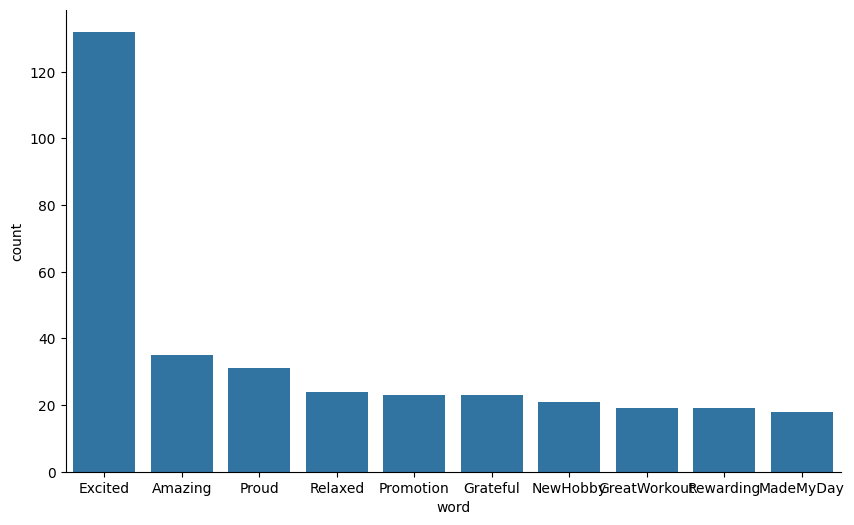

In [19]:
freq_negative_words=nltk.FreqDist(negative_hastags_unnest)
sorted_tuple_list= sorted(freq_negative_words.items(),key = lambda x: x[1],reverse=True)
word=[]
count=[]
for m,n in sorted_tuple_list:
    word.append(m)
    count.append(n)
updated_word= [re.sub('#','',w) for w in word ]
df_negative=pd.DataFrame({
                  'word':updated_word,
                    'count': count})
df_negative_plot = df_negative.nlargest(10,columns='count')
fig_dims=(10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_negative_plot,x='word',y='count',ax=ax)
sns.despine()

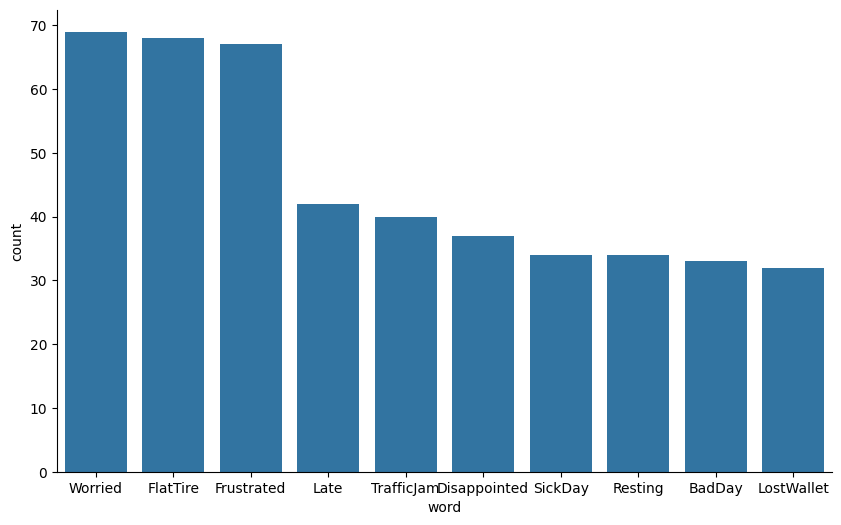

In [20]:
freq_positive_words=nltk.FreqDist(positive_hastags_unnest)
sorted_tuple_list= sorted(freq_positive_words.items(),key = lambda x: x[1],reverse=True)
word=[]
count=[]
for m,n in sorted_tuple_list:
    word.append(m)
    count.append(n)
updated_word= [re.sub('#','',w) for w in word ]
df_positive=pd.DataFrame({
                  'word':updated_word,
                    'count': count})
df_positive_plot = df_positive.nlargest(10,columns='count')
fig_dims=(10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_positive_plot,x='word',y='count',ax=ax)
sns.despine()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combined['tidy_tweet'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.232539,0.0,0.0,0.0,0.485117,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.280885,0.0,0.0,0.0,0.000000,0.0,0.419049,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [22]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
!pip install pandas
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure train_tfidf_matrix and Trainset have the same number of samples
train_tfidf_matrix = tfidf_matrix[:len(Trainset)] # Use len(Trainset) to slice

# Access the label column using its correct name
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(
    train_tfidf_matrix, Trainset[' label'], test_size=0.3, random_state=17 # Access using ' label'
)

## Applying Machine Learning Models

In [24]:
from sklearn.metrics import f1_score

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [26]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.20401947, 0.79598053],
       [0.13120091, 0.86879909],
       [0.89172563, 0.10827437],
       [0.91491241, 0.08508759],
       [0.206013  , 0.793987  ],
       [0.16287465, 0.83712535],
       [0.08707777, 0.91292223],
       [0.34037173, 0.65962827],
       [0.92437172, 0.07562828],
       [0.17350298, 0.82649702],
       [0.88921447, 0.11078553],
       [0.174523  , 0.825477  ],
       [0.16287465, 0.83712535],
       [0.11608845, 0.88391155],
       [0.09850683, 0.90149317],
       [0.92262645, 0.07737355],
       [0.83458822, 0.16541178],
       [0.12277126, 0.87722874],
       [0.18610765, 0.81389235],
       [0.16305233, 0.83694767],
       [0.25296701, 0.74703299],
       [0.15184865, 0.84815135],
       [0.15217567, 0.84782433],
       [0.91918514, 0.08081486],
       [0.31645038, 0.68354962],
       [0.17962065, 0.82037935],
       [0.11657981, 0.88342019],
       [0.17603432, 0.82396568],
       [0.19003636, 0.80996364],
       [0.11849951, 0.88150049],
       [0.

In [27]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_int = prediction_tfidf[:,1]>=0.3

# Use the built-in int instead of np.int
prediction_int=prediction_int.astype(int)
prediction_int

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,

#### F1 Score

In [28]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.9977011494252873

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [30]:
dct_tfidf=dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [31]:
dct_int=dct_tfidf[:,1]>=0.5
dct_int=dct_int.astype(int)

#### F1 Score

In [32]:
dct_f1_score=f1_score(y_valid_tfidf,dct_int)
dct_f1_score

0.9863013698630136

### K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn_trained = knn.fit(x_train_tfidf,y_train_tfidf)
knn_predict=knn_trained.predict(x_valid_tfidf)


#### F1 Score

In [34]:
knn_f1_score=f1_score(y_valid_tfidf,knn_predict)
knn_f1_score

0.9977011494252873

### Support Vector Classifier

In [35]:
from sklearn.svm import SVC
svc_trained=SVC(kernel='poly',degree=3).fit(x_train_tfidf,y_train_tfidf)
svc_predict=svc_trained.predict(x_valid_tfidf)

#### F1 Score

In [36]:
svc_f1_score=f1_score(y_valid_tfidf,svc_predict)
svc_f1_score

0.9977011494252873

### Model Comparison

In [37]:
Algo=['LogisticRegression','DecisionTree','KNearestNeighbors','SVC']
score = [log_tfidf,dct_f1_score,knn_f1_score,svc_f1_score]
compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[1,2,3,4]).T
compare

,1,2,3,4
Model,LogisticRegression,DecisionTree,KNearestNeighbors,SVC
F1_Score,0.997701,0.986301,0.997701,0.997701


### Applying Logistic Regression (highest F1 score) for sentiment prediction

In [38]:
# Assuming you want to predict on a subset of data corresponding to Testset,
# make sure test_tfidf_matrix has the same number of rows as Testset
test_tfidf_matrix = tfidf_matrix[:len(Testset)]

# Predict probabilities
test_pred = Log_Reg.predict_proba(test_tfidf_matrix)

# Apply threshold for classification
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

# Assign predictions to 'label' column in Testset
Testset['label'] = test_pred_int

# It's unclear what you intended to do with this line.
# If you want to drop a specific row, provide the row label or index.
Testset.drop(index)

,id,label,tweet,label
0,1,1,@JohnDoe I just got a promotion at work! Feeli...,1
1,2,0,@JaneDoe I can't believe I lost my wallet at t...,0
2,3,1,@BobSmith Just finished an incredible book! It...,1
3,4,0,@SarahJones I had a terrible day at work. Ever...,0
4,5,1,@MikeWilson I finally learned how to bake a ca...,1
...,...,...,...,...
395,395,1,@LiamThompson I just completed a big project a...,0
396,396,0,@SophiaDavis I lost my favorite jacket. I can'...,1
397,397,1,@EthanGreen I had a wonderful day at the beach...,0
398,398,0,@AvaJohnson I got a call from a telemarketer d...,1
